In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import the library we need

In [112]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

There are two ways to build a neural network.

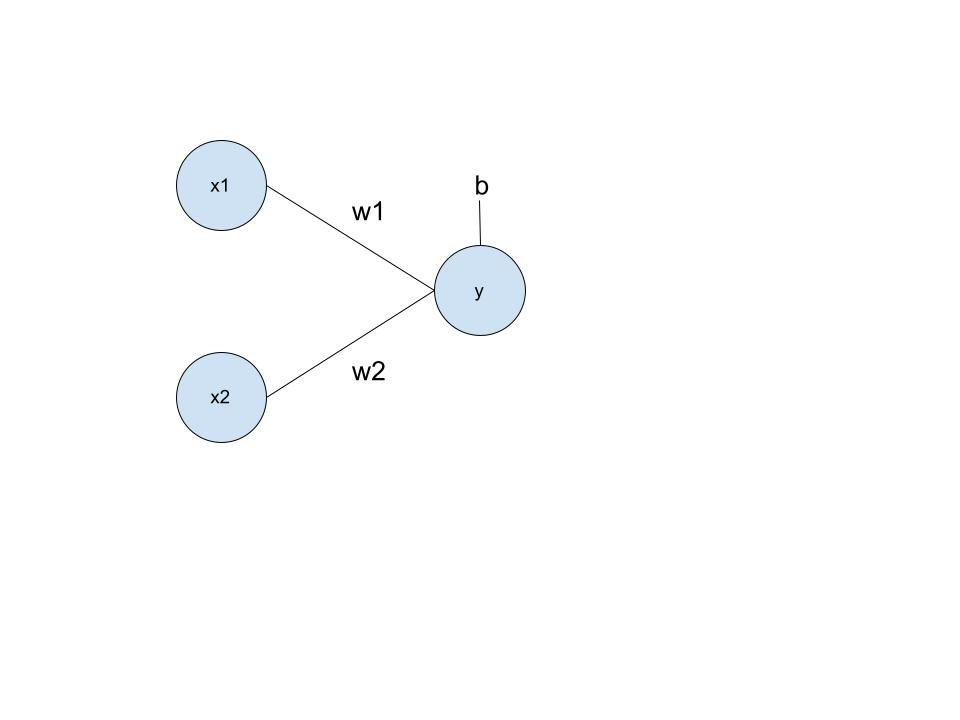

In [114]:
model_1 = Sequential([
    Dense(1, input_dim=2)])

In [115]:
model_2 = Sequential()
model_2.add(Dense(1, input_dim=2))

We can see from the .summary() that there is no difference between these two ways.

In [116]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [117]:
model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


##Loss function (error between the true values and the predict values)

1. Regression problem

In [118]:
#assume we have y_true and y_predict
y_true = np.array([1,2,3,4])
y_predict = np.array([0,1,2,4])

in this case we use the loss: mean squared error (MSE).

In [119]:
def mse(y_true, y_predict):
  loss = np.mean(np.square(y_true - y_predict))
  return loss

In [120]:
loss = mse(y_true, y_predict)
print(loss)

0.75


2. Binary classification problem

In [121]:
#assume we have y_true and y_predict
y_true = np.array([1,1,0,0])
y_predict = np.array([0.9,0.7,0.1,0.4])

in this case we use binary cross entropy

In [122]:
def binary_ce(y_true, y_predict):
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))
  return loss

In [123]:
loss = binary_ce(y_true, y_predict)
print(loss)

0.2695553997550939


let's see what will happen in four extreme cases.

In [124]:
y_true = np.array([1])
y_predict = np.array([0])
loss = binary_ce(y_true, y_predict)
print(loss)

inf


<ipython-input-122-3e42889cd178>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


In [125]:
y_true = np.array([1])
y_predict = np.array([0.9999999999])
loss = binary_ce(y_true, y_predict)
print(loss)

1.000000082790371e-10


In [126]:
y_true = np.array([0])
y_predict = np.array([1])
loss = binary_ce(y_true, y_predict)
print(loss)

inf


<ipython-input-122-3e42889cd178>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


In [127]:
y_true = np.array([0])
y_predict = np.array([0.0000000001])
loss = binary_ce(y_true, y_predict)
print(loss)

1.000000082790371e-10


## Gradient (Backpropagation)

In [160]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([3, 5, 7, 9, 11])

In [161]:
def mse(y_true, y_predict):
  loss = np.mean(np.square(y_true - y_predict))
  return loss

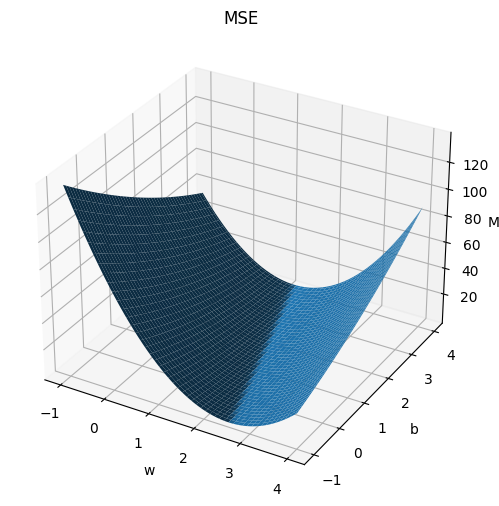

In [162]:
from mpl_toolkits.mplot3d import Axes3D


w_values = np.linspace(-1, 4, 100)
b_values = np.linspace(-1, 4, 100)


w_values, b_values = np.meshgrid(w_values, b_values)

#calculate mse corresponding to w and b
mse_values = np.array([mse(Y, w*X + b) for w, b in zip(np.ravel(w_values), np.ravel(b_values))])
mse_values = mse_values.reshape(w_values.shape)


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(w_values, b_values, mse_values)


ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('MSE')
plt.title('MSE')
plt.show()


if we fix w into 2 for example, we can plot the relation ship between MSE and b

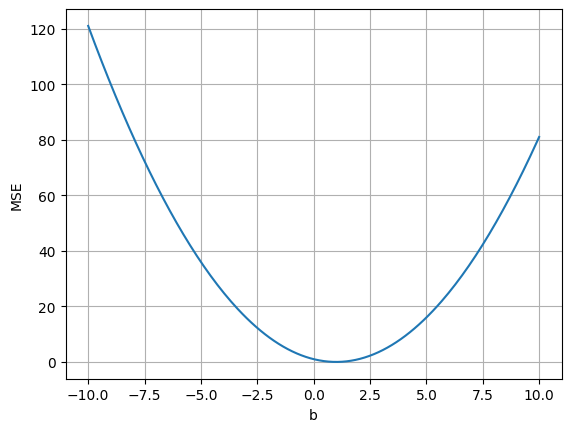

In [171]:
w = 2


b_values = np.linspace(-10, 10, 200)

#calculate mse corresponding to b
mse_values = [mse(Y, w*X + b) for b in b_values]


plt.plot(b_values, mse_values)
plt.xlabel('b')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


similarly for fixed b = 1

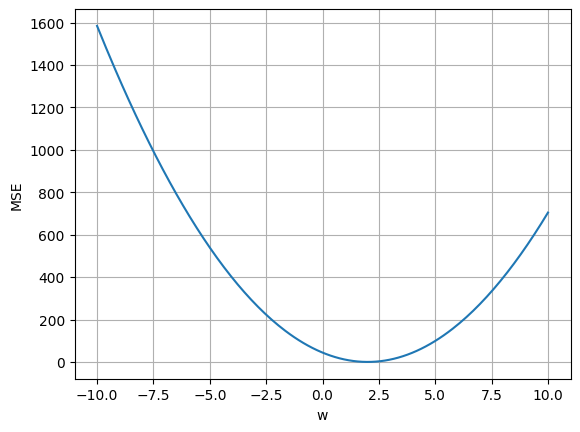

In [164]:
b = 1

w_values = np.linspace(-10, 10, 200)

#calculate mse corresponding to w
mse_values = [mse(Y, w*X + b) for w in w_values]


plt.plot(w_values, mse_values)
plt.xlabel('w')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


In [165]:
from sympy import symbols, diff

X = np.array([1, 2, 3, 4, 5])
Y = np.array([3, 5, 7, 9, 11])

#define the symbols
w, b = symbols('w b')
y_pred = w * X + b

mse_diff = np.mean(np.square(Y - y_pred))

# partial derivative to w and b
dw = diff(mse_diff, w)
db = diff(mse_diff, b)

In [166]:
print(dw)
print(db)

6*b + 22*w - 50
2*b + 6*w - 14


So let's assume b to be 1, and w to be 0

In [167]:
k_temp = 6 + 0 - 50
b_temp = mse(Y,np.array([1,1,1,1,1]))

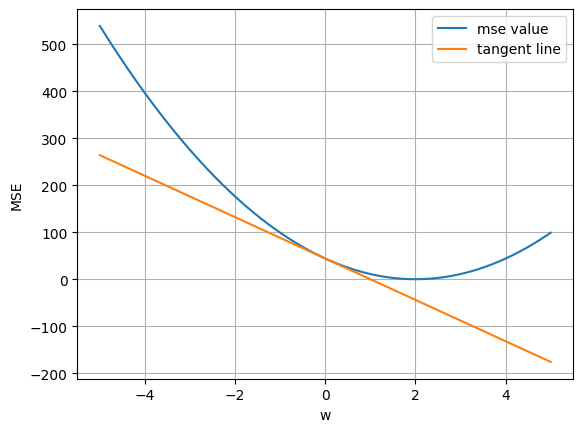

In [170]:
b = 1

w_values = np.linspace(-5, 5, 200)

#calculate mse corresponding to w
mse_values = [mse(Y, w*X + b) for w in w_values]



plt.plot(w_values, mse_values, label='mse value')

#plot the tangent line
plt.plot(w_values, k_temp*w_values + b_temp,label='tangent line')

plt.xlabel('w')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

##Train a network (regression)

In [175]:
X = np.array([1,2,3,4,5])
Y = np.array([3,5,7,9,11])

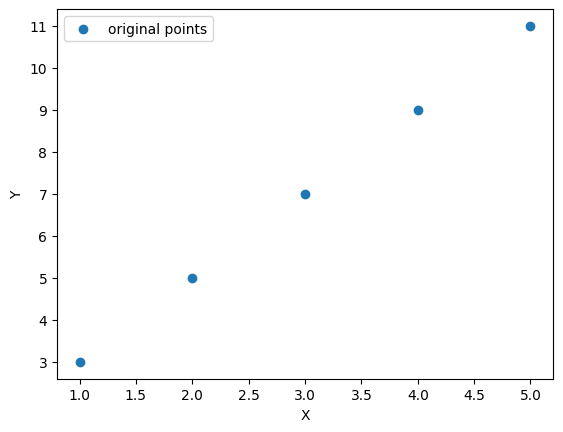

In [173]:
plt.scatter(X,Y,label='original points')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
model_nn1 = Sequential([
    Dense(1, input_dim=1)])

model_nn1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.05)
model_nn1.compile(loss='mse', optimizer=adam)
model_nn1.fit(X, Y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 696ms/step - loss: 0.0685
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0658
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0492
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0504
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0407
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0301
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0259
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0180
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 11/200
1/1 [==============================] - 0s 14ms/step - loss: 0.0095
Epoch 12/200
1/1 [==============================] - 0s 10ms/step - loss: 0.0087
Epoch 13/200
1/1 [==============================] - 0s 1

We use .get_weights to see the actural value of trainded weight and bias.

In [ ]:
weights=model_nn1.get_weights()
print(weights)

[array([[1.999999]], dtype=float32), array([1.000001], dtype=float32)]


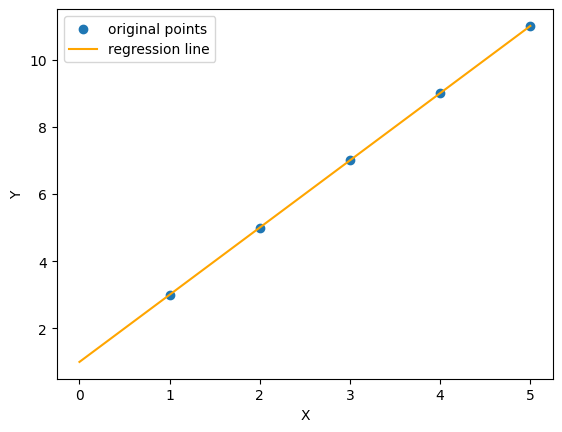

In [ ]:
plt.scatter(X,Y,label='original points')

x1 = np.linspace(0,5,10)
y1 = weights[0]*x1 + weights[1]
plt.plot(x1,y1.reshape(10,),color='orange',label='regression line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##Train a network (binary classification)

In [195]:
X = np.concatenate([np.random.rand(50, 2) * 0.2, np.random.rand(50, 2) * 0.2 + 0.8])
Y = np.concatenate([np.zeros(50), np.ones(50)])

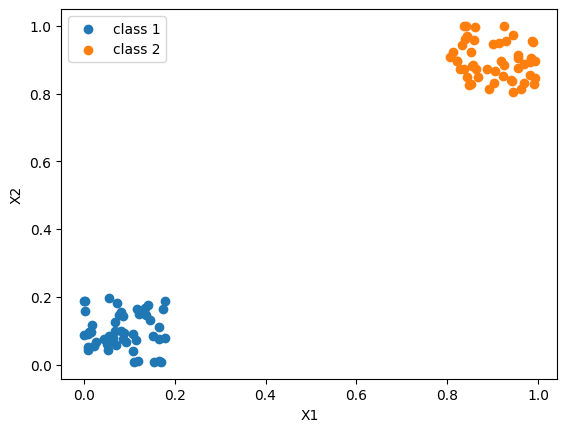

In [196]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [197]:
model_nn2 = Sequential([
    Dense(1,input_dim=2, activation='sigmoid')  #we will talk about this activation later
])

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model_nn2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn2.fit(X, Y, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.4553 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4363 - accuracy: 0.5200
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.5400
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.6200
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4080 - accuracy: 0.6900
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.7200
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3906 - accuracy: 0.7700
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8300
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3742 - accuracy: 0.8500
Epoch 11/100
4/4 [===========

In [198]:
weights=model_nn2.get_weights()
print(weights)

[array([[3.647334 ],
       [3.1556664]], dtype=float32), array([-2.559055], dtype=float32)]


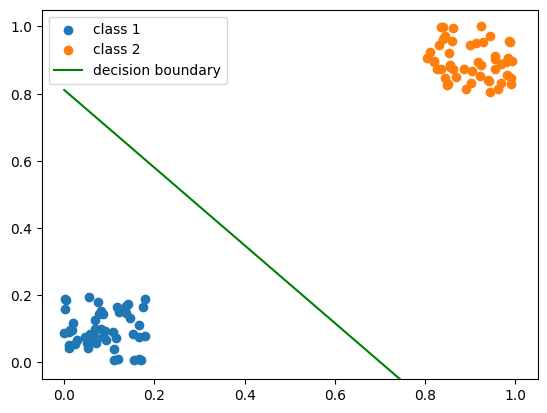

In [199]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')

x1 = np.linspace(0,1,10)
x2 = -(weights[0][0]*x1 + weights[1])/weights[0][1]

#weights[0][0]*x + weights[0][1]*x2 + weights[1]=0


plt.plot(x1,x2,color='green',label='decision boundary')


plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.legend()
plt.show()

Let's talk about why we set activation='sigmoid' and why the line drawn above is the decision boundary.

A sigmoid function looks like this

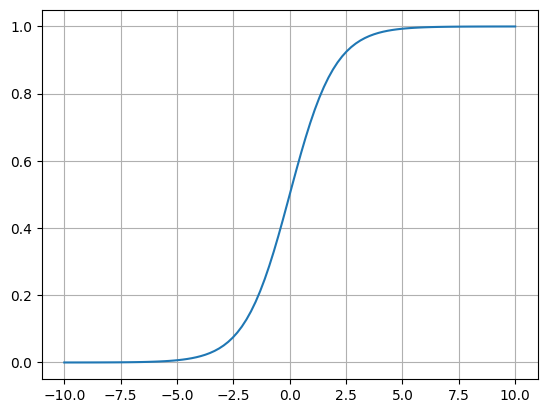

In [200]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y

x = np.linspace(-10, 10, 100)
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.show()

When we set activation='sigmoid', we apply the sigmoid function to the output result.

It looks like this:

output = sigmoid(w1*x1 + w2*x2 + b)

it squashes the output values between 0 and 1, and the decision boundary is 0.5

when sigmoid(w1*x1 + w2*x2 + b) = 0.5 , actually, from the graph we can see that, it is equivalent that 1*x1 + w2*x2 + b = 0

##Activation function

Why we add activation function?

-- To solve the non-linear problem

This first comes up when trying to solve the XOR problem

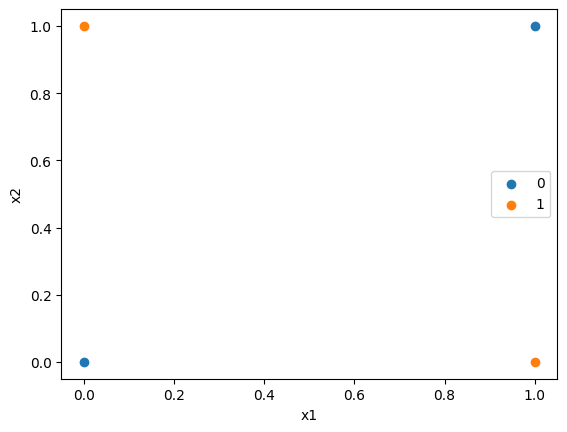

In [255]:
X = np.array(([0,0],[1,1],[1,0],[0,1]))
Y = np.array([0,0,1,1])
plt.scatter(X[0:2,0],X[0:2,1],label='0')
plt.scatter(X[2:4,0],X[2:4,1],label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

A linear classifier will never solve this problem.

Let's try.

In [256]:
model_nn3 = Sequential([
    Dense(1,input_dim=2, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model_nn3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn3.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 541ms/step - loss: 0.8318 - accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.8272 - accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8227 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.8183 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8140 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8098 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8057 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8016 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7977 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7938 - accuracy: 0.7500
Epoch 11/100
1/1 [

[array([[0.03976966],
       [0.60073954]], dtype=float32), array([-0.38206983], dtype=float32)]


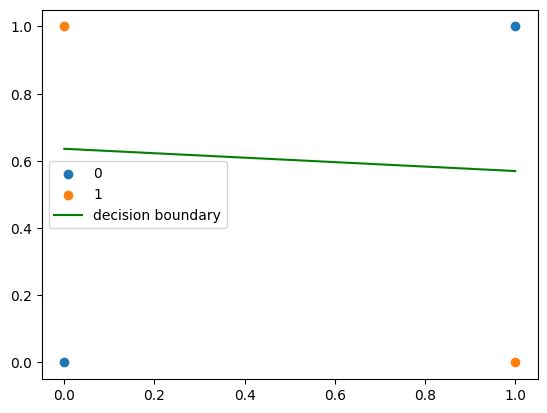

In [257]:
weights=model_nn3.get_weights()
print(weights)

plt.scatter(X[0:2,0],X[0:2,1],label='0')
plt.scatter(X[2:4,0],X[2:4,1],label='1')

x1 = np.linspace(0,1,10)
x2 = -(weights[0][0]*x1 + weights[1])/weights[0][1]

#weights[0][0]*x + weights[0][1]*x2 + weights[1]=0


plt.plot(x1,x2,color='green',label='decision boundary')



plt.legend()
plt.show()

In [277]:
model_nn4 = Sequential([
    Dense(2,input_dim=2, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.5)

model_nn4.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

model_nn4.fit(X, Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 682ms/step - loss: 0.7348 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 0.7198 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 0.7250 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 0.7016 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6788 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6666 - accuracy: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6567 - accuracy: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6355 - accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6009 - accuracy: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 16ms/step - loss: 0.5634 - accuracy: 0.7500
Epoch 11/500
1/1 [=

In [278]:
weights=model_nn4.get_weights()
print(weights)

[array([[  9.555794, -15.169741],
       [  9.550923, -14.665277]], dtype=float32), array([-14.494448,   5.540273], dtype=float32), array([[-16.24492 ],
       [-16.749212]], dtype=float32), array([8.014245], dtype=float32)]


313/313 [==============================] - 1s 2ms/step


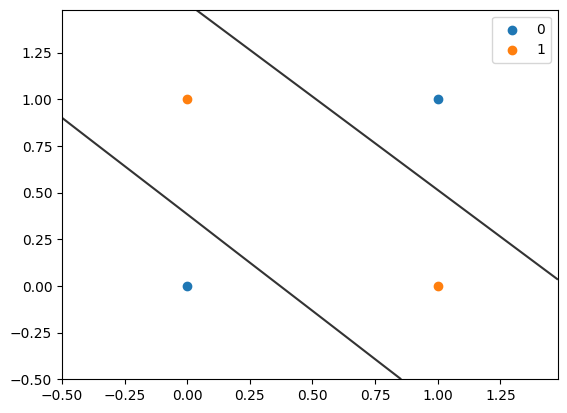

In [279]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = model_nn4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
plt.contour(xx, yy, Z, levels=[0.5], cmap='Greys', vmin=0, vmax=0.6)

plt.scatter(X[0:2,0],X[0:2,1],label='0')
plt.scatter(X[2:4,0],X[2:4,1],label='1')

plt.legend()
plt.show()


common activation functions:

Sigmoid function

In [262]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y

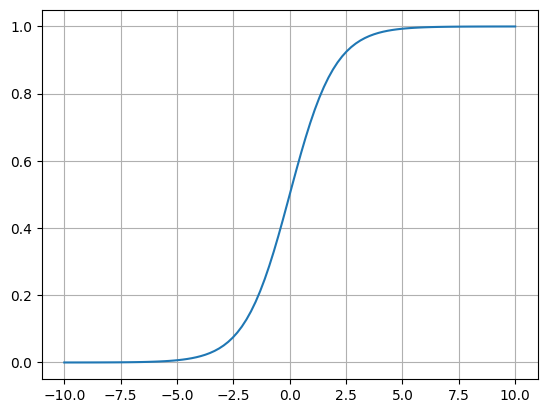

In [263]:
x = np.linspace(-10, 10, 100)
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.show()

ReLU function

In [264]:
def relu(x):
  y = np.maximum(0,x)
  return y

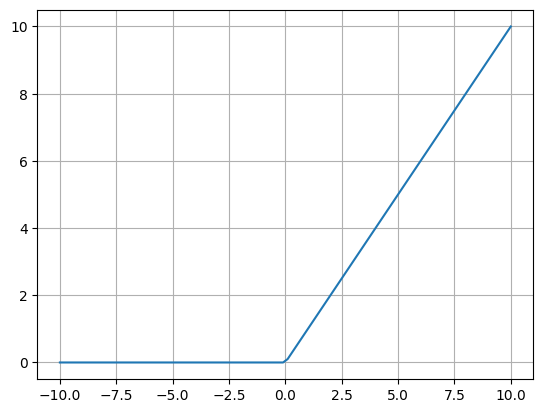

In [265]:
x = np.linspace(-10, 10, 100)
plt.plot(x,relu(x))
plt.grid(True)
plt.show()

tanh function

In [266]:
def tanh(x):
  y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  return y

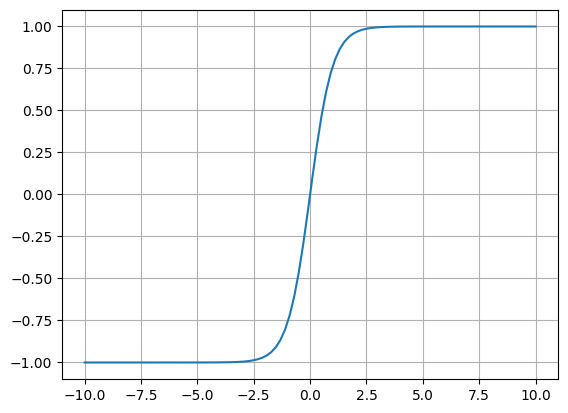

In [267]:
x = np.linspace(-10, 10, 100)
plt.plot(x,tanh(x))
plt.grid(True)
plt.show()

In binary classification case, we add sigmoid function to the output also to limit it within 0 to 1.

How to add activation function in keras?

In [268]:
model_activation = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')])

In [269]:
model_activation.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
